In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import  utils

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [4]:
labels, features_list = utils.load_features()

In [3]:
df_f.head()

AttributeError: 'tuple' object has no attribute 'head'

In [5]:
df_m = utils.load_metadata()

In [24]:

num_feature_dimensions=100
pca = PCA(n_components = num_feature_dimensions)
pca.fit(features_list)
feature_list_compressed = pca.transform(features_list)

In [78]:
# make a color dict
from bokeh.palettes import d3
color_palette = np.array(d3['Category10'][8])
color_lst = color_palette[df_m['color_map'].to_list()]

num_colors = 8
color_dict = {}
for i in range(num_colors):
    color_dict[i] = d3['Category10'][num_colors][i]

In [80]:
# make color categories
color_desc_dict = {0:'general',
                  1:'porträt'}
df_m['color_map'] = 0
#filter for portraits
fltr = df_m['title'].str.lower().str.contains(color_desc_dict[1])
df_m.loc[fltr, 'color_map'] = 1

# map actual colors
df_m['color_map'] = df_m['color_map'].map(color_dict)

object_id
3     #1f77b4
18    #1f77b4
19    #1f77b4
33    #1f77b4
52    #1f77b4
Name: color_map, dtype: object

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.004s...
[t-SNE] Computed neighbors for 1000 samples in 0.135s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.648448
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.022667
[t-SNE] KL divergence after 1000 iterations: 1.049381


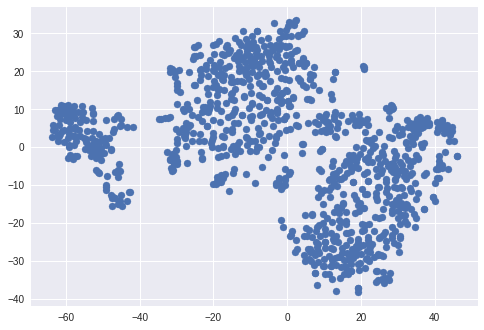

In [82]:
num_feature_dimensions=100      # Set the number of features
pca = PCA(n_components = num_feature_dimensions)
pca.fit(features_list)
feature_list_compressed = pca.transform(features_list)

num_samples=1000
# For speed and clarity, we'll analyze about first half of the dataset.
selected_features = feature_list_compressed[:num_samples]
selected_class_ids = labels[:num_samples]

tdf = df_m.loc[labels[:num_samples],:]
selected_titles = tdf['title'].to_list()
selected_colors = tdf['color_map'].to_list()

ser_img = tdf.loc[:,'img_url'].str.replace('resolution=superImageResolution','resolution=lowImageResolution')
selected_imgs = ser_img.to_list()[:num_samples]
tsne_results = TSNE(n_components=2,verbose=1,metric='euclidean').fit_transform(selected_features)

# Plot a scatter plot from the generated t-SNE results
colormap = plt.cm.get_cmap('coolwarm')
c=selected_class_ids
cmap=colormap
scatter_plot = plt.scatter(tsne_results[:,0],tsne_results[:,1])
# plt.colorbar(scatter_plot)
plt.show()

In [83]:
from bokeh.plotting import ColumnDataSource, figure, output_file, show
from bokeh.embed import components

output_file("toolbar.html")

source = ColumnDataSource(data=dict(
    x=tsne_results[:,0],
    y=tsne_results[:,1],
    desc=selected_titles,
    imgs=selected_imgs,
    colors=color_lst
    ))

TOOLTIPS = """
    <div>
        <div>
            <img
                src="@imgs" height="75" alt="@imgs"
                style="float: left; margin: 0px 15px 15px 0px;"
                border="2"
            ></img>
        </div>
        <div>
            <span style="font-size: 17px; font-weight: bold;">@desc</span>
            <span style="font-size: 15px; color: #966;">[$index]</span>
        </div>
        <div>
            <span style="font-size: 15px;">Location</span>
            <span style="font-size: 10px; color: #696;">($x, $y)</span>
        </div>
    </div>
"""

p = figure(plot_width=600, plot_height=600, tooltips=TOOLTIPS,
           title="Mouse over the dots")

p.circle('x', 'y', size=10, color='colors', alpha=0.5, source=source)

# export to components
script, div = components(p)

show(p)

In [36]:
print(div)


<div class="bk-root" id="c8bc6831-6f60-4b67-ab96-516993225a37" data-root-id="1246"></div>


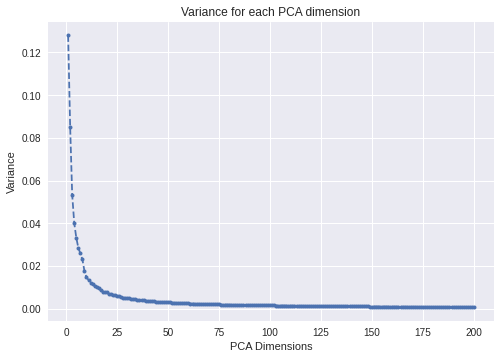

In [15]:
pca = PCA(200)
pca.fit(features_list)
plt.style.use('seaborn')
plt.plot(range(1,201),pca.explained_variance_ratio_,'o--', markersize=4)
plt.title ('Variance for each PCA dimension')
plt.xlabel('PCA Dimensions')
plt.ylabel('Variance')
plt.grid(True)
plt.show()